In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_annot(annot_path = 'dataset/LEs920/train.txt'):
    """get annotation from dataset text"""
    with open(annot_path, 'r') as f:
        txt = f.readlines()
        annotations = [line.strip() for line in txt if len(line.strip().split()[1:]) != 0]
    resdic = {}
    for ann in annotations:
        ann = ann.split(' ')
        image_path = ann[0]
        boxarr = []
        for a in ann[1:]:
            box = np.fromstring(a, sep=',')
            boxarr.append(box)
        boxarr = np.array(boxarr)
        resdic[image_path] = boxarr

    return resdic


In [3]:
def random_colors(N, bright=True):
    '''
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    '''
    import random
    import colorsys

    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def plot_bboxes(img, bboxes, labels=[], ax=None, figsize=(8, 8), title=None):
    """
    Draw bounding boxes on image
    img: img array
    bboxes: bounding boxes array, shape [N bboxes, 4]
    """
    import random
    import matplotlib.pyplot as plt
    from matplotlib import patches
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
    
    N = bboxes.shape[0]
    colors = random_colors(N)
    ax.imshow(img)
    ax.set_title(title)
    for i in range(N):
        # for faster rcnn
        #y1, x1, y2, x2 = bboxes[i] [:4]
        #y1, x1, y2, x2 = int(y1), int(x1), int(y2), int(x2)

        # for yolo
        x1, y1, x2, y2 = bboxes[i][:4]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
        p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                              alpha=0.7, linestyle="dashed",
                              edgecolor=colors[i], facecolor='none')
        ax.add_patch(p)
        
        # Label
        #class_id = class_ids[i]
        #score = scores[i] if scores is not None else None
        #label = class_names[class_id]
        x = random.randint(x1, (x1 + x2) // 2)
        
        if len(labels)!=0:
            caption = "{:.1f}".format( labels[i] )
        else:
            caption = None
        ax.text(x2 - 8, y1, caption,
                color='w', size=10, backgroundcolor="none")



In [4]:
def fits_to_uint8(fitsarr, vmin=-1, vmax=1,):
    
    # clip
    data = np.clip(fitsarr, vmin, vmax)
    # scale to [0,1]
    data = (data - vmin) / (vmax - vmin)
    # convert to uint8
    data = (255 * data).astype(np.uint8)
    # invert y axis
    #data = data[::-1, :]
    return data


In [14]:
pwd

'/Users/home/Documents/Research/repos/TensorFlow-2.x-YOLOv3/preprocessing'

In [8]:
ls

LE576_aug.ipynb               dataset/
LEs576_star/                  fits_crop_split_skymap.ipynb
LEs576_star_coco/             labelme2coco.py*
atlas/                        labelme2voc.py*
cand1.csv                     labels.txt
coco_to_yolo.ipynb            viewbox.ipynb
data_aug/


In [15]:
resdic = get_annot(annot_path='./dataset/LE_cand1/train_aug.txt')

In [16]:
imgfiles = list( resdic.keys() )

In [17]:
bboxes = resdic[ imgfiles[0] ]
bboxes

array([[447.,  72., 544., 139.,   0.],
       [216., 136., 355., 196.,   0.],
       [364.,  93., 458., 158.,   0.],
       [205., 318., 261., 343.,   0.],
       [260., 345., 314., 376.,   0.],
       [  0., 133.,  29., 163.,   1.],
       [472., 403., 498., 429.,   1.],
       [468., 109., 563., 205.,   1.],
       [419.,  10., 445.,  36.,   1.],
       [196., 372., 228., 404.,   1.]])

In [13]:
imgfiles

['./dataset/LE_cand1/tiles_aug/003_2_r180.jpg',
 './dataset/LE_cand1/tiles_aug/002_1_fliph_r270.jpg',
 './dataset/LE_cand1/tiles_aug/003_2_fliph_r90.jpg',
 './dataset/LE_cand1/tiles_aug/011_6.jpg',
 './dataset/LE_cand1/tiles_aug/010_6_fliph_r90.jpg',
 './dataset/LE_cand1/tiles_aug/002_2_r270.jpg',
 './dataset/LE_cand1/tiles_aug/002_2_fliph_r180.jpg',
 './dataset/LE_cand1/tiles_aug/006_4_fliph_r180.jpg',
 './dataset/LE_cand1/tiles_aug/018_1_r180.jpg',
 './dataset/LE_cand1/tiles_aug/018_1.jpg',
 './dataset/LE_cand1/tiles_aug/002_2_r180.jpg',
 './dataset/LE_cand1/tiles_aug/013_5_r180.jpg',
 './dataset/LE_cand1/tiles_aug/006_4_r180.jpg',
 './dataset/LE_cand1/tiles_aug/006_4_r90.jpg',
 './dataset/LE_cand1/tiles_aug/001_2_r180.jpg',
 './dataset/LE_cand1/tiles_aug/010_6_fliph.jpg',
 './dataset/LE_cand1/tiles_aug/003_2_r90.jpg',
 './dataset/LE_cand1/tiles_aug/017_3_fliph_r270.jpg',
 './dataset/LE_cand1/tiles_aug/006_6_fliph_r270.jpg',
 './dataset/LE_cand1/tiles_aug/002_2_fliph_r90.jpg',
 './da

In [11]:
bboxes[:, 4]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [95]:
imgfile = './dataset/LE_cand1/tiles_aug/013_5_fliph_r90.jpg'
fitspath = imgfile.replace('jpg', 'fits.npz')



In [96]:
fitspath.replace('.fits.npz', '')

'./dataset/LE_cand1/tiles_aug/013_5_fliph_r90'

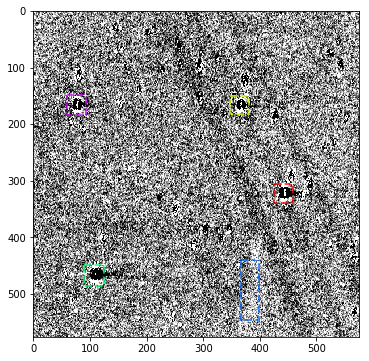

In [97]:


fitspath = imgfile.replace('jpg', 'fits.npz')
    
fitsarr = np.load(fitspath)['fitsarr']

# expand dimensions to (W, H, 3)
#image = np.repeat( np.expand_dims(fitsarr, axis=2), repeats=3, axis=2)

# convert fits to jpg uint8
image = fits_to_uint8(fitsarr=fitsarr)

# box
bboxes = resdic[imgfile]

figsize=(6,6)

fig, ax = plt.subplots(1, figsize=figsize)

plot_bboxes(ax=ax, img=image, bboxes=bboxes, labels=bboxes[:, 4])

/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


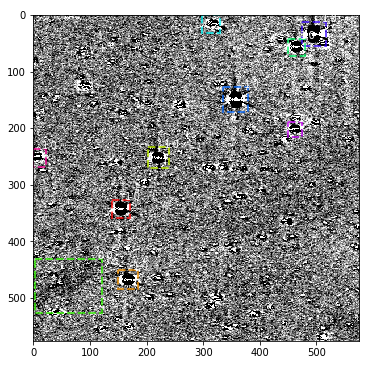

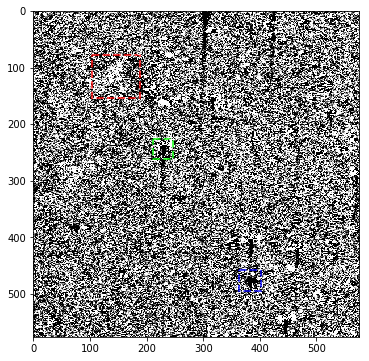

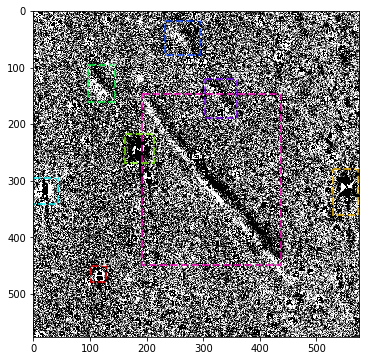

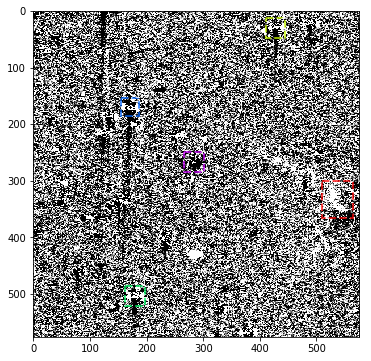

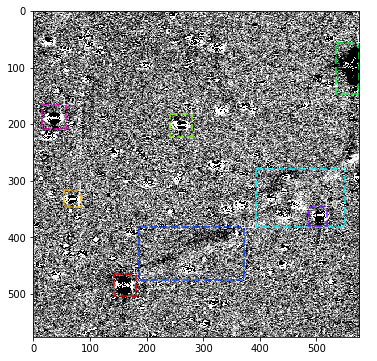

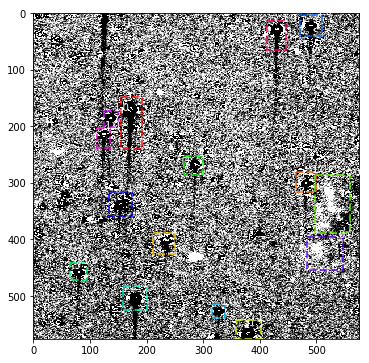

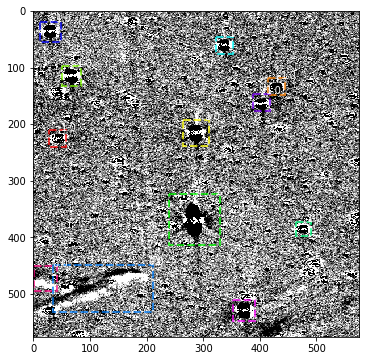

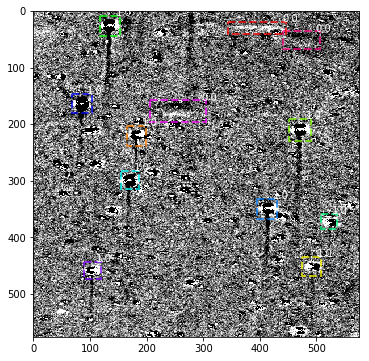

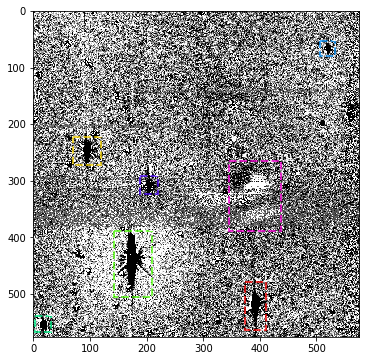

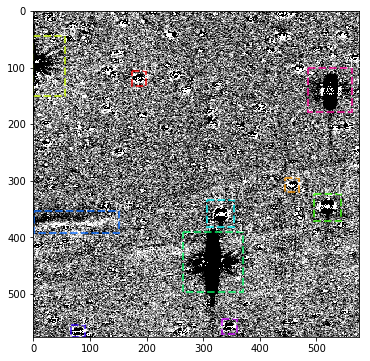

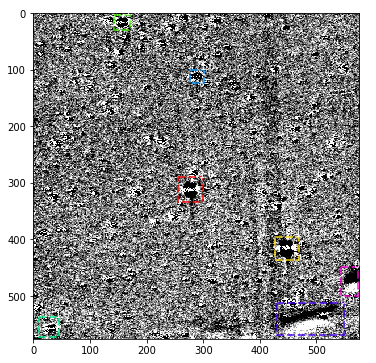

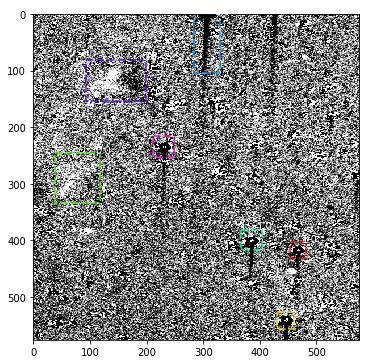

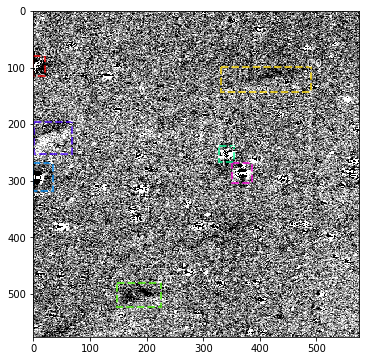

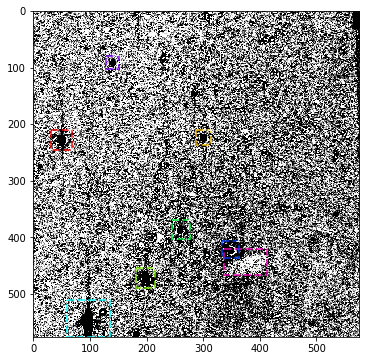

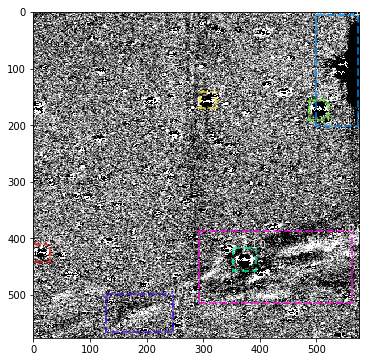

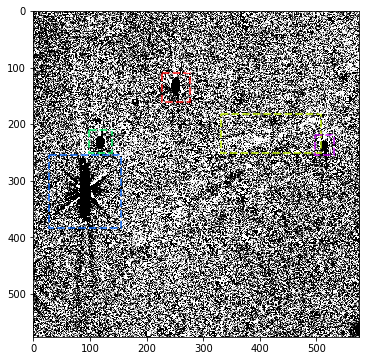

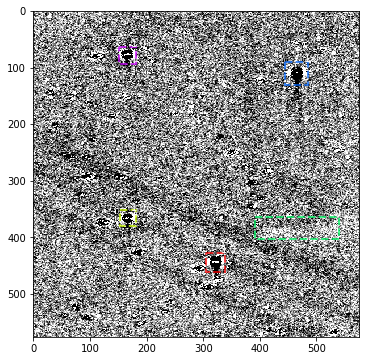

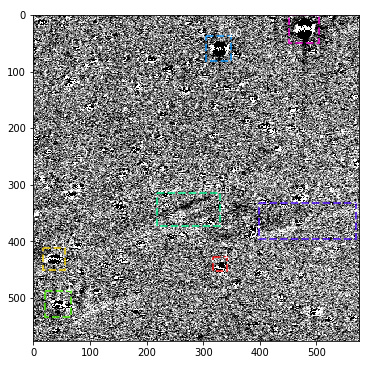

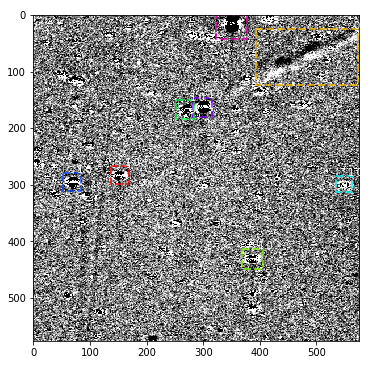

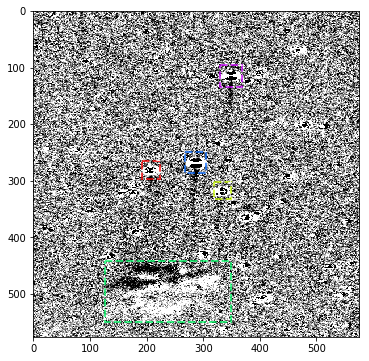

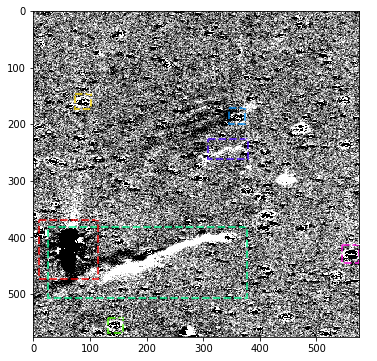

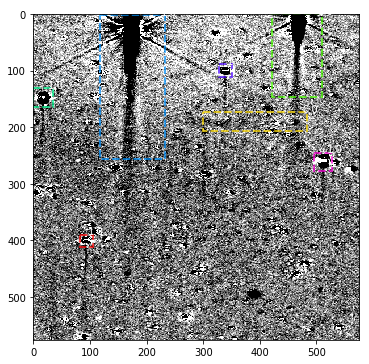

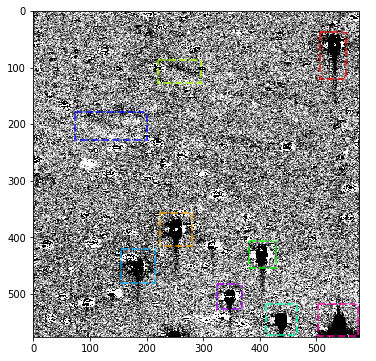

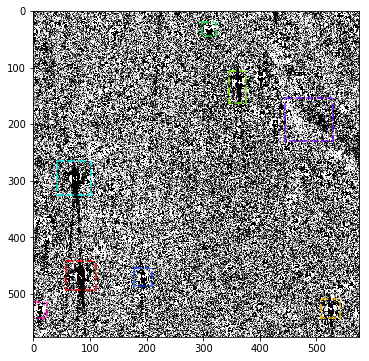

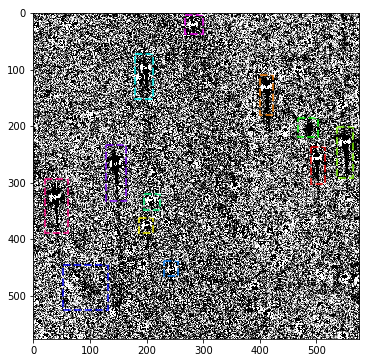

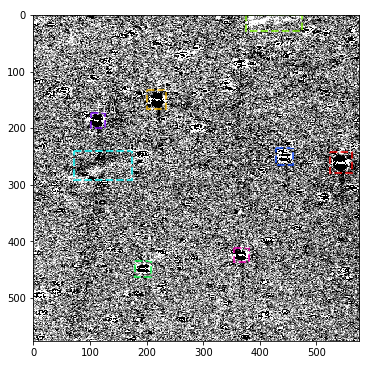

In [18]:
figsize=(6,6)

# load fits
# imgfile = imgfiles[0]
for imgfile in imgfiles:
    fitspath = imgfile.replace('jpg', 'fits.npz')
    
    fitsarr = np.load(fitspath)['fitsarr']
    
    # expand dimensions to (W, H, 3)
    #image = np.repeat( np.expand_dims(fitsarr, axis=2), repeats=3, axis=2)
    
    # convert fits to jpg uint8
    image = fits_to_uint8(fitsarr=fitsarr)
    
    # box
    bboxes = resdic[imgfile]
    
    # plot 
    fig, ax = plt.subplots(1, figsize=figsize)

    plot_bboxes(ax=ax, img=image, bboxes=bboxes, labels=bboxes[:, 4])
    
    savetofile = '{}_ann.pdf' .format( fitspath.replace('.fits.npz', '') )
    fig.savefig( savetofile )


In [68]:
26*.3


7.8

### get histogram 

In [5]:
def get_info(imgdata, imgsize=576):
    """get number of stars/LEs and size of stars/LEs
    labels: 0=LE, 1=star
    """
    #img, img_meta, bboxes, labels = imgdata
    #img, img_meta, bboxes, labels, path = imgdata
    #diag_img = np.sqrt(img.shape[0]**2 + img.shape[1]**2)
    diag_img = np.sqrt(imgsize**2 + imgsize**2)
    
    bboxes = imgdata [:, :4]
    labels = imgdata [:, 4]
    
    nLE = labels[ labels==0 ].shape[0]
    nstar = labels[ labels==1 ].shape[0]

    size_LEs = []
    size_stars = []
    for bbox in bboxes[labels==0]:
        dx = bbox[2] - bbox[0]
        dy = bbox[3] - bbox[1]
        diag = np.sqrt( dx**2 + dy**2 ) / diag_img
        size_LEs.append(diag)

    for bbox in bboxes[labels==1]:
        dx = bbox[2] - bbox[0] 
        dy = bbox[3] - bbox[1]
        diag = np.sqrt( dx**2 + dy**2 ) / diag_img
        size_stars.append(diag)

    return nLE, nstar, np.array(size_LEs), np.array(size_stars)

def get_N_SIZE(imgfiles):
    """get NLEs, Nstars, SIZE_LEs, SIZE_stars, each as list
    """
    NLEs = []
    Nstars = []
    SIZE_LEs = np.array([])
    SIZE_stars = np.array([])

    for imgfile in imgfiles:
        #img, img_meta, bboxes, labels = imgdata
        #img, img_meta, bboxes, labels, path = imgdata
        
        imgdata = resdic[imgfile]
        bboxes = imgdata [:, :4]
        labels = imgdata [:, 4]
    
        if np.isin([0, 1], labels).all():
            nLE, nstar, size_LEs, size_stars,  = get_info(imgdata) # get info for each image
            #print(imgfile, nLE, nstar)
            NLEs.append(nLE)
            Nstars.append(nstar)
            SIZE_LEs = np.concatenate( [size_LEs, SIZE_LEs] )
            SIZE_stars = np.concatenate( [size_stars, SIZE_stars] )
    return np.array(NLEs), np.array(Nstars), SIZE_LEs, SIZE_stars


In [6]:
resdic = get_annot(annot_path='./dataset/LE_cand1/LE_all_aug.txt')
imgfiles = list( resdic.keys() )


NLEs, Nstars, SIZE_LEs, SIZE_stars = get_N_SIZE(imgfiles)

In [14]:
NLEs.shape, Nstars.shape

((240,), (240,))

In [12]:
NLEs.sum(), Nstars.sum()

(600, 1328)

In [10]:
NLEs.mean(), Nstars.mean(), 

(2.5, 5.533333333333333)

In [9]:
SIZE_LEs.mean(), SIZE_stars.mean()

(0.11480500947901258, 0.0667098611506411)

In [17]:
600/240, 1328/240

(2.5, 5.533333333333333)

Text(0, 0.5, 'number of images')

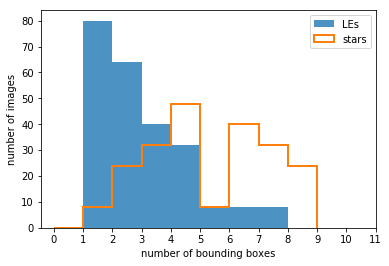

In [143]:
bins = np.arange(0, 10, 1)
plt.hist(NLEs, bins=bins, density=False,histtype='stepfilled', alpha=0.8, label='LEs', )
plt.hist(Nstars, bins=bins, density=False, histtype='step', alpha=1, label='stars', linewidth=2); 
plt.xticks(np.arange(0, 12, 1));
plt.legend()
plt.xlabel('number of bounding boxes')
plt.ylabel('number of images') 

Text(0, 0.5, 'frequency ')

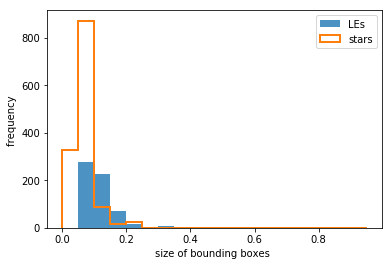

In [140]:
bins = np.arange(0, 1, 0.05)

plt.hist(SIZE_LEs, bins=bins, density=False, histtype='stepfilled', alpha=0.8, label='LEs'); 
plt.hist(SIZE_stars, bins=bins, density=False, histtype='step', alpha=1, label='stars', linewidth=2); 
plt.legend()
plt.xlabel('size of bounding boxes ')
plt.ylabel('frequency ')


Text(0, 0.5, 'number of images')

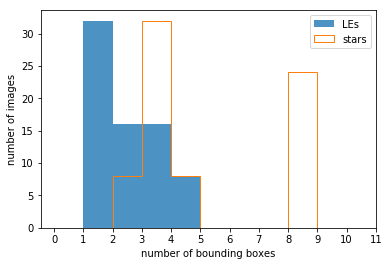

In [113]:
resdic = get_annot(annot_path='./dataset/LE_cand1/test_aug.txt')
imgfiles = list( resdic.keys() )


NLEs, Nstars, SIZE_LEs, SIZE_stars = get_N_SIZE(imgfiles)

bins = np.arange(0, 10, 1)
plt.hist(NLEs, bins=bins, density=False,histtype='stepfilled', alpha=0.8, label='LEs')
plt.hist(Nstars, bins=bins, density=False, histtype='step', alpha=1, label='stars'); 
plt.xticks(np.arange(0, 12, 1));
plt.legend()
plt.xlabel('number of bounding boxes')
plt.ylabel('number of images')

Text(0, 0.5, 'frequency ')

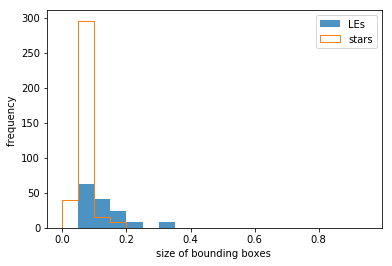

In [114]:
bins = np.arange(0, 1, 0.05)

plt.hist(SIZE_LEs, bins=bins, density=False, histtype='stepfilled', alpha=0.8, label='LEs'); 
plt.hist(SIZE_stars, bins=bins, density=False, histtype='step', alpha=1, label='stars'); 
plt.legend()
plt.xlabel('size of bounding boxes ')
plt.ylabel('frequency ')



In [116]:
NLEs

array([1, 3, 1, 1, 2, 3, 4, 3, 1, 2, 3, 1, 2, 1, 1, 3, 1, 1, 1, 4, 2, 2,
       1, 2, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 4, 4, 1, 2, 1, 3, 2, 4, 1, 1,
       2, 1, 4, 3, 1, 1, 4, 1, 1, 3, 1, 3, 1, 3, 3, 1, 2, 2, 2, 4, 3, 1,
       3, 1, 3, 2, 1, 3])